Let's make the label categorical based on the students' score:
- 1: Below 400; 
- 2: At or above 400 but below 475; 
- 3: At or above 475 but below 550; 
- 4: At or above 550 but below 625; 
- 5: At or above 625


In [2]:
# In order to be able to import config from a parent directory
import sys
sys.path.append("..")
print(sys.path)

['/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/Second_attempts', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python311.zip', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/lib-dynload', '', '/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages', '..']


In [3]:
import pandas as pd
import numpy as np
import config

In [4]:
df_g8_data = pd.read_csv(config.ml_data_1, index_col=False)

In [5]:
df_g8_data.sample()

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,mean_PV
7734,Yes,None or very few (0–10 books),Agree a lot,Agree a lot,At least once a week,Agree a little,Agree a lot,Every or almost every lesson,Agree a little,Disagree a little,366.926422


Let's make the label categorical based on the students' mean_PV:
- 1: Below 400; 
- 2: At or above 400 but below 475; 
- 3: At or above 475 but below 550; 
- 4: At or above 550 but below 625; 
- 5: At or above 625

In [6]:
# create a list of our conditions
conditions = [
    (df_g8_data['mean_PV'] < 400),
    (df_g8_data['mean_PV'] >= 400) & (df_g8_data['mean_PV'] < 475),
    (df_g8_data['mean_PV'] >= 475) & (df_g8_data['mean_PV'] < 550),
    (df_g8_data['mean_PV'] >= 550) & (df_g8_data['mean_PV'] < 625),
    (df_g8_data['mean_PV'] >= 625)
]

In [7]:
# create a list of the values we want to assign for each condition

values = ['1','2','3','4','5']

In [8]:
df_g8_data['score_category'] = np.select(conditions, values)

In [9]:
df_g8_data.sample(10)

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,mean_PV,score_category
6196,Yes,None or very few (0–10 books),Agree a lot,Disagree a lot,Never,Disagree a lot,Agree a lot,About half the lessons,Disagree a little,Agree a little,331.739518,1
1098,No,Enough to fill two bookcases (101–200 books),Disagree a lot,Disagree a little,At least once a week,Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,469.383548,2
115,Yes,None or very few (0–10 books),Agree a lot,Agree a little,Never,Agree a lot,Agree a lot,Every or almost every lesson,Agree a lot,Agree a lot,360.194564,1
5014,Yes,None or very few (0–10 books),Agree a lot,Agree a lot,A few times a year,Agree a little,Agree a lot,Some lessons,Disagree a little,Disagree a little,342.567036,1
1548,Yes,None or very few (0–10 books),Disagree a lot,Disagree a lot,Once or twice a month,Agree a little,Disagree a little,Some lessons,Agree a little,Disagree a little,336.681152,1
6995,No,Enough to fill one shelf (11–25 books),Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,About half the lessons,Agree a lot,Agree a little,298.984830,1
8151,No,Enough to fill one shelf (11–25 books),Agree a lot,Disagree a little,At least once a week,Agree a lot,Disagree a little,Every or almost every lesson,Agree a little,Agree a lot,477.365856,3
7548,Yes,Enough to fill one shelf (11–25 books),Agree a little,Agree a lot,A few times a year,Agree a lot,Agree a little,Every or almost every lesson,Disagree a lot,Agree a lot,471.022660,2
5049,Yes,None or very few (0–10 books),Agree a little,Disagree a little,A few times a year,Disagree a lot,Disagree a lot,About half the lessons,Disagree a lot,Disagree a lot,330.338058,1
3649,No,Enough to fill one bookcase (26–100 books),Agree a little,Agree a little,At least once a week,Disagree a little,Agree a lot,Some lessons,Disagree a lot,Agree a lot,341.330764,1


In [10]:
df_g8_data.dtypes

BSBG05D            object
BSBG04             object
BSBG13E            object
BSBG13D            object
BSBG14A            object
BSBM16A            object
BSBM17D            object
BSBM18C            object
BSBM20E            object
BSBM20I            object
mean_PV           float64
score_category     object
dtype: object

In [11]:
df_g8_data['score_category'].value_counts()

score_category
1    5300
2    2435
3     623
4      95
5       5
Name: count, dtype: int64

In [12]:
best = df_g8_data[df_g8_data['score_category']=='5']
best

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,mean_PV,score_category
1237,Yes,Enough to fill three or more bookcases (more t...,Agree a lot,Agree a lot,A few times a year,Agree a lot,Agree a little,Every or almost every lesson,Agree a lot,Agree a lot,628.041948,5
4167,Yes,Enough to fill two bookcases (101–200 books),Agree a lot,Agree a lot,A few times a year,Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,633.955688,5
4171,Yes,Enough to fill one bookcase (26–100 books),Agree a lot,Agree a little,A few times a year,Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,633.577474,5
4179,Yes,Enough to fill one bookcase (26–100 books),Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,649.182768,5
6226,Yes,Enough to fill three or more bookcases (more t...,Agree a little,Agree a lot,A few times a year,Agree a lot,Agree a little,Some lessons,Agree a lot,Agree a lot,627.092576,5


In [38]:
df_g8_data.to_csv('../data/TIMSS-2019_data/TIMSS-2019_Morocco_8th/ml_data_2.csv', index=False)

In [39]:
from ydata_profiling import ProfileReport
ml_profiles_2 = ProfileReport(df_g8_data)

In [40]:
ml_profiles_2.to_file("ml_profiles_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
BSBG04_percentages = df_g8_data[(df_g8_data['score_category'] == '1')]['BSBG04'].value_counts(normalize=True)
BSBG04_percentages

BSBG04
None or very few (0–10 books)                             0.556604
Enough to fill one shelf (11–25 books)                    0.314906
Enough to fill one bookcase (26–100 books)                0.090377
Enough to fill two bookcases (101–200 books)              0.022830
Enough to fill three or more bookcases (more than 200)    0.015283
Name: proportion, dtype: float64

In [15]:
df_g8_data[(df_g8_data['score_category'] == '1')]['BSBG13E'].value_counts(normalize=True)

BSBG13E
Agree a lot          0.669434
Agree a little       0.217736
Disagree a little    0.062264
Disagree a lot       0.050566
Name: proportion, dtype: float64

Text(0.5, 1.0, 'STUDENTS THINK IMPORTANT TO DO WELL IN MATH')

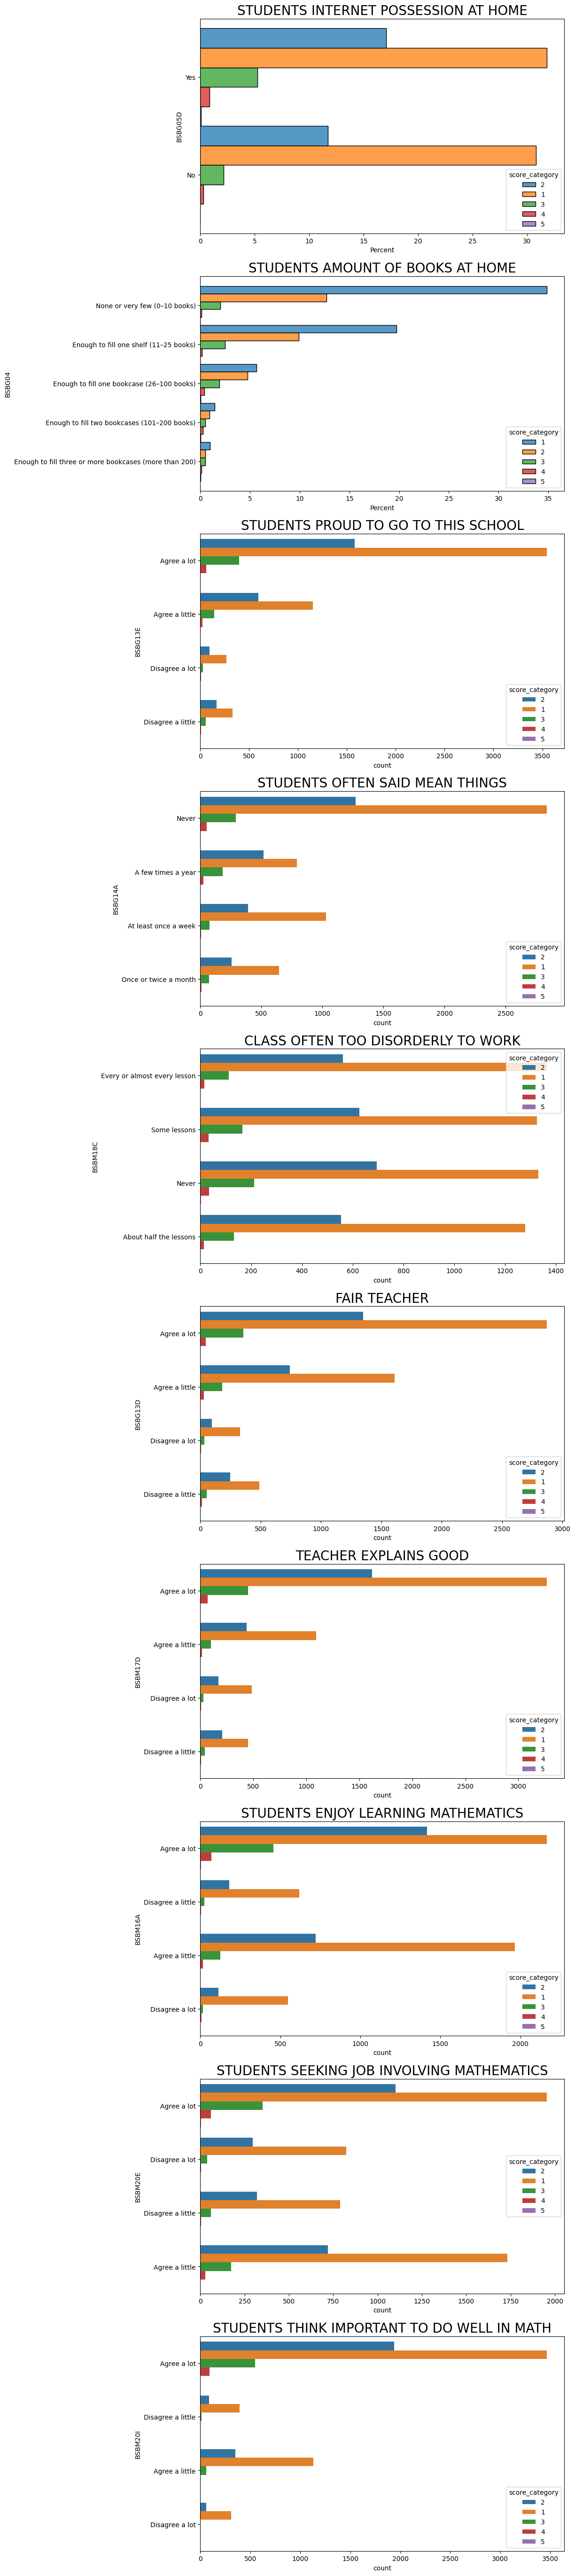

In [49]:
fig, ax = plt.subplots(nrows=10, figsize = [10,70])
order = ['1','2','3','4','5']

sns.histplot(df_g8_data, y=df_g8_data["BSBG05D"], stat = 'percent', multiple="dodge", hue=df_g8_data["score_category"], ax = ax[0]).axes.set_title("STUDENTS INTERNET POSSESSION AT HOME",fontsize=20)
sns.histplot(df_g8_data, y=df_g8_data["BSBG04"], stat = 'percent', multiple="dodge", hue_order=order, hue=df_g8_data["score_category"], ax = ax[1]).axes.set_title("STUDENTS AMOUNT OF BOOKS AT HOME",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBG13E"], hue=df_g8_data["score_category"], ax = ax[2]).axes.set_title("STUDENTS PROUD TO GO TO THIS SCHOOL",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBG14A"], hue=df_g8_data["score_category"], ax = ax[3]).axes.set_title("STUDENTS OFTEN SAID MEAN THINGS",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM18C"], hue=df_g8_data["score_category"], ax = ax[4]).axes.set_title("CLASS OFTEN TOO DISORDERLY TO WORK",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBG13D"], hue=df_g8_data["score_category"], ax = ax[5]).axes.set_title("FAIR TEACHER",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM17D"], hue=df_g8_data["score_category"], ax = ax[6]).axes.set_title("TEACHER EXPLAINS GOOD",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM16A"], hue=df_g8_data["score_category"], ax = ax[7]).axes.set_title("STUDENTS ENJOY LEARNING MATHEMATICS",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM20E"], hue=df_g8_data["score_category"], ax = ax[8]).axes.set_title("STUDENTS SEEKING JOB INVOLVING MATHEMATICS",fontsize=20)
sns.countplot(df_g8_data, y=df_g8_data["BSBM20I"], hue=df_g8_data["score_category"], ax = ax[9]).axes.set_title("STUDENTS THINK IMPORTANT TO DO WELL IN MATH",fontsize=20)


In [16]:
BSBG04_percentages = BSBG04_percentages.to_frame()

In [17]:
BSBG04_percentages

,proportion
BSBG04,
None or very few (0–10 books),0.556604
Enough to fill one shelf (11–25 books),0.314906
Enough to fill one bookcase (26–100 books),0.090377
Enough to fill two bookcases (101–200 books),0.022830
Enough to fill three or more bookcases (more than 200),0.015283


<Axes: xlabel='BSBG04'>

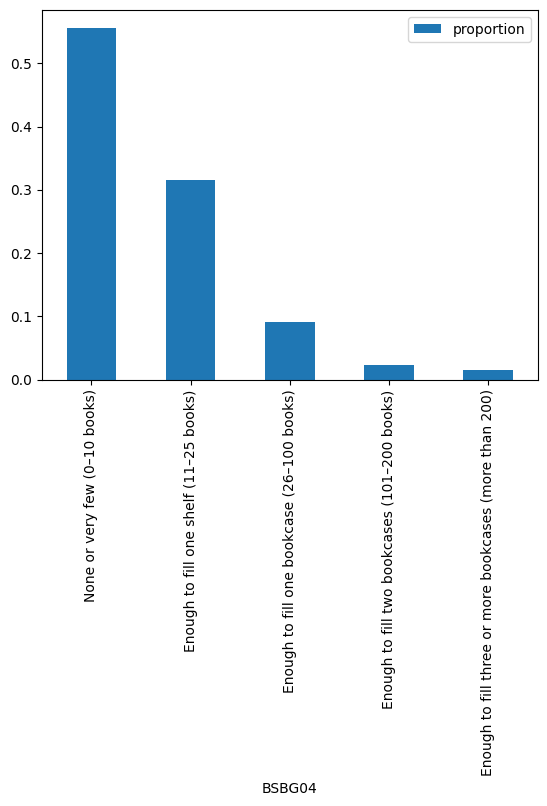

In [21]:
BSBG04_percentages.plot(kind="bar")